In [6]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random
import cv2

In [9]:
path='/content/drive/MyDrive/Dataset'

In [10]:
data_dir = pathlib.Path(path)

## Getting class names

In [11]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

## Total number of images

In [12]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6410

## Image

In [13]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

/content/drive/MyDrive/Dataset/Mild_Demented/mild_808.jpg


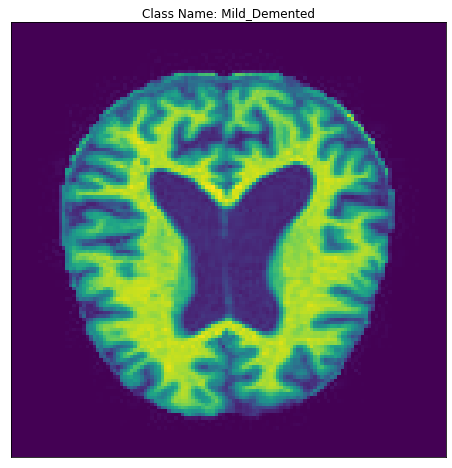

In [18]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))
plot(str(Mild_Demented),"Mild_Demented")

/content/drive/MyDrive/Dataset/Moderate_Demented/moderate_25.jpg


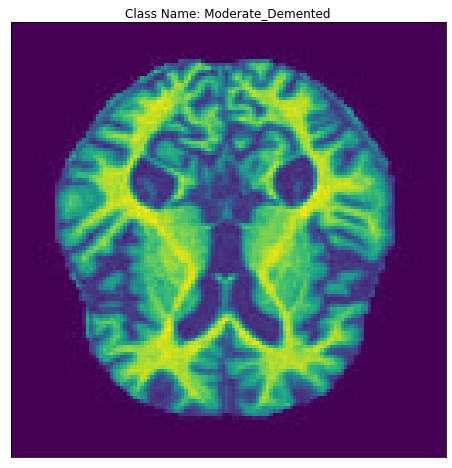

In [19]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))
plot(str(Moderate_Demented),"Moderate_Demented")

/content/drive/MyDrive/Dataset/Non_Demented/non_2722.jpg


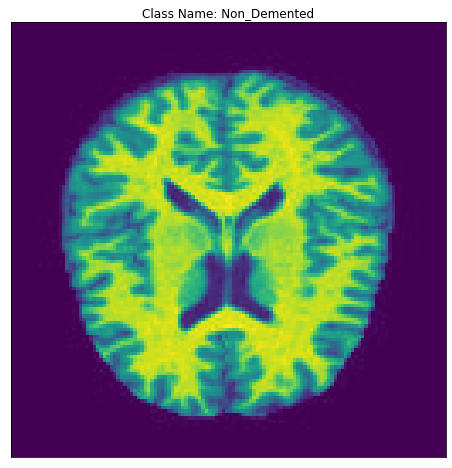

In [20]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))
plot(str(Non_Demented),"Non_Demented")

/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_378.jpg


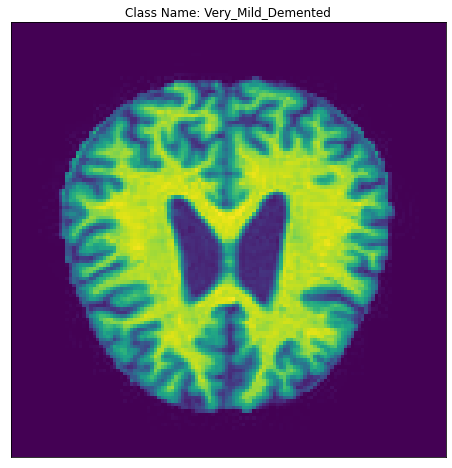

In [21]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))
plot(str(Very_Mild_Demented),"Very_Mild_Demented")

## Spliting the Dataset

In [22]:
batch_size = 32
img_height = 224
img_width = 224

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6410 files belonging to 4 classes.
Using 5128 files for training.
Found 6410 files belonging to 4 classes.
Using 1282 files for validation.


## Building the model

In [24]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [25]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [26]:
epochs = 5 
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/5
161/161 [==============================] - 1566s 9s/step - loss: 0.9659 - accuracy: 0.5337 - val_loss: 0.8089 - val_accuracy: 0.6349
Epoch 2/5
161/161 [==============================] - 298s 2s/step - loss: 0.7051 - accuracy: 0.6899 - val_loss: 0.5360 - val_accuracy: 0.7746
Epoch 3/5
161/161 [==============================] - 280s 2s/step - loss: 0.4793 - accuracy: 0.7980 - val_loss: 0.3412 - val_accuracy: 0.8651
Epoch 4/5
161/161 [==============================] - 289s 2s/step - loss: 0.3079 - accuracy: 0.8787 - val_loss: 0.2183 - val_accuracy: 0.9197
Epoch 5/5
161/161 [==============================] - 288s 2s/step - loss: 0.1893 - accuracy: 0.9278 - val_loss: 0.1507 - val_accuracy: 0.9477


## Predictions

1/1 [==============================] - 0s 41ms/step


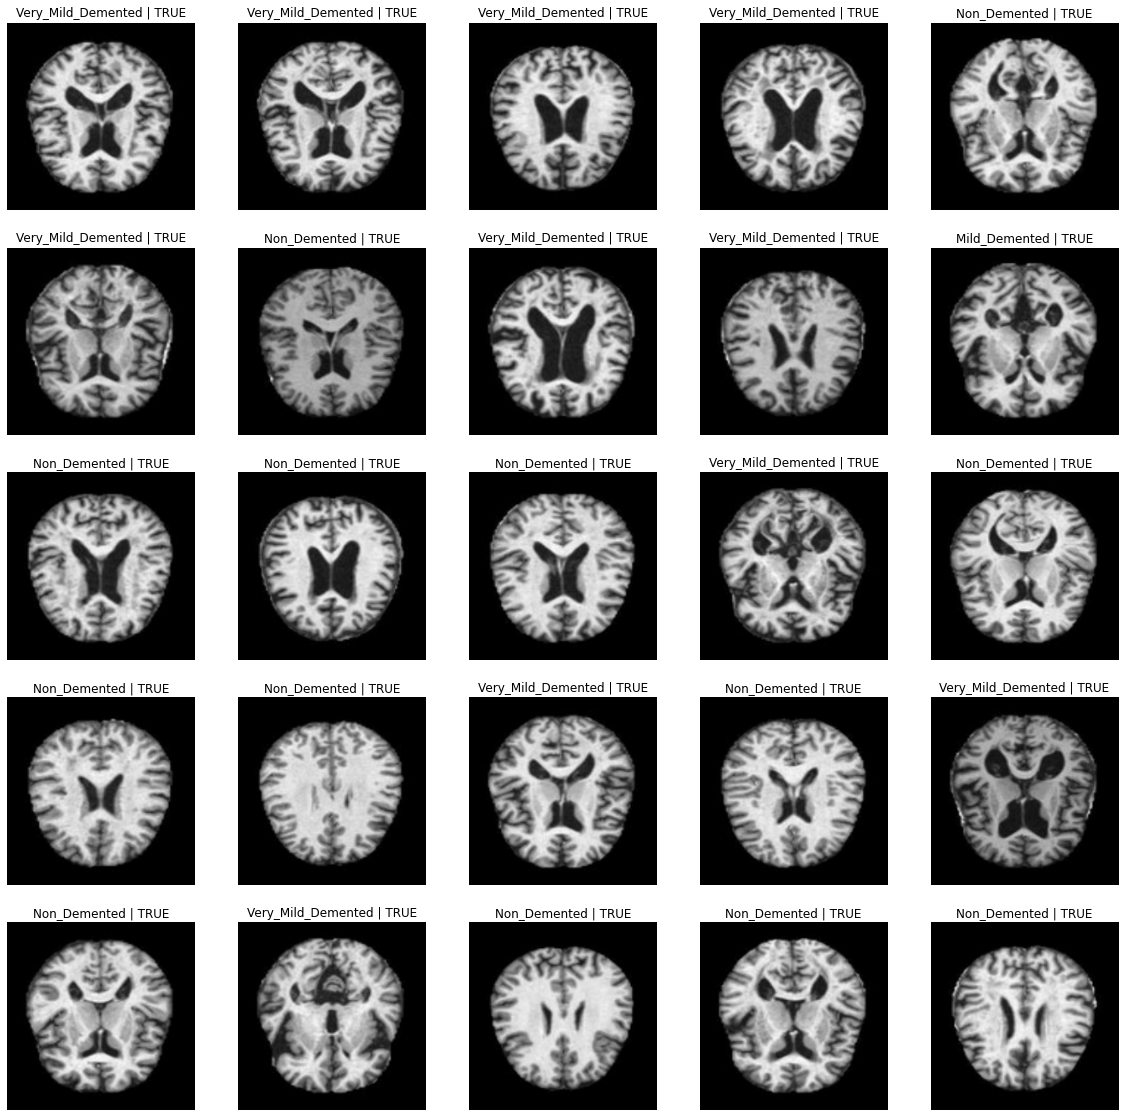

In [27]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")